**PROJECT TITLE:-SENTIMENT ANALYSIS FOR HOTEL REVIEW.**




**PROBLEM STATEMENT:-TO ANALYSE POSITIVE AND NEGATIVE RATING**

**TEXT CLASSIFICATION  WITH ANN**

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [3]:
path="/content/drive/MyDrive/NLP=KDA MRITYUNJAY SIR/tripadvisor_hotel_reviews.csv"
df=pd.read_csv(path)
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [4]:
df.isna().sum()

Review    0
Rating    0
dtype: int64

In [5]:
stop = stopwords.words('english')

In [6]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
def text_cleaning(text):
  #step1 -: lower and tokenization
  tokens = word_tokenize(text.lower())

  #step2 -: filtering only alphabets
  word_tokens = [t for t in tokens if(t.isalpha())]

  #step3 -: remove stopwords
  clean_token = [t for t in word_tokens if(t not in stop)]

  #step4 -: lemmatization
  lemma = WordNetLemmatizer()
  lemman_token = [lemma.lemmatize(t) for t in clean_token]

  return " ".join(lemman_token)

In [8]:
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [9]:
df["Review"] =df["Review"].apply(text_cleaning)

In [10]:
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice room experience hotel monaco seattle good...,3
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay went seahawk game awesom...,5
...,...,...
20486,best kept secret time staying charm ca beat ti...,5
20487,great location price view hotel great quick pl...,4
20488,ok look nice modern outside desk staff particu...,2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [ ]:
x = df["Review"]
y = df["Rating"]

In [ ]:
y

0        4
1        2
2        3
3        5
4        5
        ..
20486    5
20487    4
20488    2
20489    1
20490    2
Name: Rating, Length: 20491, dtype: int64

In [ ]:
y.replace({1:0,2:0,3:1,4:1,5:1}, inplace=True)

In [ ]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20486    1
20487    1
20488    0
20489    0
20490    0
Name: Rating, Length: 20491, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
xtraincv = cv.fit_transform(xtrain)
xtestcv = cv.transform(xtest)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xtraincv, ytrain)
ypredcv = dt.predict(xtestcv)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypredcv))

              precision    recall  f1-score   support

           0       0.56      0.53      0.54       969
           1       0.91      0.92      0.92      5179

    accuracy                           0.86      6148
   macro avg       0.73      0.72      0.73      6148
weighted avg       0.86      0.86      0.86      6148



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
xtraintf = tf.fit_transform(xtrain)
xtesttf = tf.transform(xtest)

In [ ]:
dt2 = DecisionTreeClassifier()
dt2.fit(xtraintf, ytrain)
ypredtf = dt2.predict(xtesttf)

In [ ]:
print(classification_report(ytest, ypredtf))

              precision    recall  f1-score   support

           0       0.55      0.53      0.54       969
           1       0.91      0.92      0.92      5179

    accuracy                           0.86      6148
   macro avg       0.73      0.72      0.73      6148
weighted avg       0.86      0.86      0.86      6148



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
xtraincv = xtraincv.toarray()
xtestcv = xtestcv.toarray()

In [ ]:
#step1 -: initialize the model
ann = Sequential()

#step2 -: add the hidden layers
ann.add(Dense(units=10, activation="relu"))
ann.add(Dense(units=6, activation="relu"))
ann.add(Dense(units=1, activation="sigmoid"))

#step3 -: establish the connection between the layers
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

#step4 -: train the neural network
ann.fit(xtraincv, ytrain, batch_size=50, epochs=20)

#step5 -: make prediction
ypredann = ann.predict(xtestcv)

Epoch 1/20
287/287 [==============================] - 6s 18ms/step - loss: 0.2989 - accuracy: 0.8979
Epoch 2/20
287/287 [==============================] - 5s 18ms/step - loss: 0.1229 - accuracy: 0.9565
Epoch 3/20
287/287 [==============================] - 5s 17ms/step - loss: 0.0645 - accuracy: 0.9792
Epoch 4/20
287/287 [==============================] - 5s 18ms/step - loss: 0.0325 - accuracy: 0.9909
Epoch 5/20
287/287 [==============================] - 5s 17ms/step - loss: 0.0162 - accuracy: 0.9970
Epoch 6/20
287/287 [==============================] - 5s 17ms/step - loss: 0.0085 - accuracy: 0.9989
Epoch 7/20
287/287 [==============================] - 5s 18ms/step - loss: 0.0049 - accuracy: 0.9994
Epoch 8/20
287/287 [==============================] - 5s 18ms/step - loss: 0.0029 - accuracy: 0.9997
Epoch 9/20
287/287 [==============================] - 5s 18ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 10/20
287/287 [==============================] - 5s 18ms/step - loss: 0.0013 - accura

In [ ]:
ypredann = np.where(ypredann>=0.5, 1,0)

In [ ]:
print(classification_report(ytest, ypredann))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       969
           1       0.95      0.96      0.95      5179

    accuracy                           0.92      6148
   macro avg       0.87      0.83      0.85      6148
weighted avg       0.92      0.92      0.92      6148



In [ ]:
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,1
1,ok nothing special charge diamond member hilto...,0
2,nice room experience hotel monaco seattle good...,1
3,unique great stay wonderful time hotel monaco ...,1
4,great stay great stay went seahawk game awesom...,1
...,...,...
20486,best kept secret time staying charm ca beat ti...,1
20487,great location price view hotel great quick pl...,1
20488,ok look nice modern outside desk staff particu...,0
20489,hotel theft ruined vacation hotel opened sept ...,0


In [ ]:
newrec1 = df["Review"][2]
newrec2 = df["Review"][4]
newrec3 = df["Review"][20488]
newrec4 = df["Review"][20489]
newrec5 = df["Review"][20490]





In [ ]:
newrec1

'nice room experience hotel monaco seattle good hotel large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed separate wakeup call concierge busy hard touch provide guidance special hard use ipod sound dock suite non functioning decided book mediterranean suite night weekend stay choice rest party filled comparison w spent night larger square footage room great soaking tub whirlpool jet nice stay hotel arrange car service price tip reasonable driver waiting easy downside room picked person jacuzi tub bath accessory salt bubble bath stay night got checked voucher bottle champagne nice gesture fish waiting room impression room huge open space felt room big tv far away bed chore change channel ipod dock broken morning way asked desk check thermostat said degree warm try cover face night bright blue light kept got room night drop desk called maintainence came look thermostat told play setting happy 

In [ ]:
newrec2

'great stay great stay went seahawk game awesome downfall view building complain room huge staff helpful booked hotel website seahawk package charge parking got voucher taxi problem taxi driver want accept voucher barely spoke english funny thing speak arabic called started making comment girlfriend cell phone buddy took second realize said fact speak language face priceless as told said large city told head doorman issue called cab company promply answer apologized offered pay taxi buck mile stadium game plan taxi return going humpin great walk mind right christmas wonderful light homeless stowed away building entrance leave police presence greatest area stadium activity block pike street waterfront great coffee shop way hotel mantained foyer awesome wine tasting available evening best dog taking bernard time family safe hotel located service desk room bathroom huge jetted tub huge funny house keeping walked girlfriend getting dressed hear knock turn service screamed girlfriend scream

In [ ]:
newrec1cv = cv.transform([newrec1])
newpred = ann.predict(newrec1cv)

In [ ]:
res = newpred>0.5

In [ ]:
1 if(res[0][0]==True) else 0

1

In [ ]:
def check_sms(text):
  newrec1cv = cv.transform([text])
  newpred = ann.predict(newrec1cv)
  res = newpred>0.5
  return 1 if(res[0][0]==True) else 0

In [ ]:
newrec1

'nice room experience hotel monaco seattle good hotel large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed separate wakeup call concierge busy hard touch provide guidance special hard use ipod sound dock suite non functioning decided book mediterranean suite night weekend stay choice rest party filled comparison w spent night larger square footage room great soaking tub whirlpool jet nice stay hotel arrange car service price tip reasonable driver waiting easy downside room picked person jacuzi tub bath accessory salt bubble bath stay night got checked voucher bottle champagne nice gesture fish waiting room impression room huge open space felt room big tv far away bed chore change channel ipod dock broken morning way asked desk check thermostat said degree warm try cover face night bright blue light kept got room night drop desk called maintainence came look thermostat told play setting happy 

In [ ]:
newrec2

'great stay great stay went seahawk game awesome downfall view building complain room huge staff helpful booked hotel website seahawk package charge parking got voucher taxi problem taxi driver want accept voucher barely spoke english funny thing speak arabic called started making comment girlfriend cell phone buddy took second realize said fact speak language face priceless as told said large city told head doorman issue called cab company promply answer apologized offered pay taxi buck mile stadium game plan taxi return going humpin great walk mind right christmas wonderful light homeless stowed away building entrance leave police presence greatest area stadium activity block pike street waterfront great coffee shop way hotel mantained foyer awesome wine tasting available evening best dog taking bernard time family safe hotel located service desk room bathroom huge jetted tub huge funny house keeping walked girlfriend getting dressed hear knock turn service screamed girlfriend scream

In [ ]:
check_sms(newrec1) #1 means positive rating

1

In [ ]:
check_sms(newrec2)

1

In [ ]:
check_sms(newrec3) # 0 means negative rating

0

In [ ]:
check_sms(newrec4)

0

In [ ]:
check_sms(newrec5)

0

In [ ]:
value = res[0][0]

In [ ]:
value

True

In [ ]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,1
1,ok nothing special charge diamond member hilto...,0
2,nice room experience hotel monaco seattle good...,1
3,unique great stay wonderful time hotel monaco ...,1
4,great stay great stay went seahawk game awesom...,1


RNN & LSTM

In [ ]:
df["Rating"].value_counts()

1    17277
0     3214
Name: Rating, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence #unique id to each word

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout, Embedding

import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud

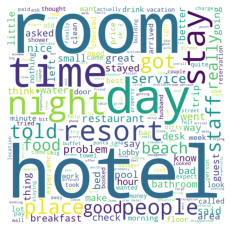

In [ ]:
wc = WordCloud(width=800, height=800,
               background_color="white",
               min_font_size=10)

wc.generate(' '.join(df[df["Rating"]==0]["Review"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

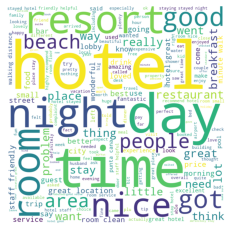

In [ ]:
wc = WordCloud(width=800, height=800,
               background_color="white",
               min_font_size=10)

wc.generate(' '.join(df[df["Rating"]==1]["Review"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
sentlen = []

for sent in df["Review"]:
  sentlen.append(len(word_tokenize(sent)))

df["sent_len"] = sentlen

df.head()

,Review,Rating,sent_len
0,nice hotel expensive parking got good deal sta...,1,79
1,ok nothing special charge diamond member hilto...,0,223
2,nice room experience hotel monaco seattle good...,1,183
3,unique great stay wonderful time hotel monaco ...,1,82
4,great stay great stay went seahawk game awesom...,1,171


In [ ]:
max(sentlen)

1752

In [ ]:
np.quantile(sentlen, 0.95)#95% of the word in doc has len equals to 246

246.0

In [ ]:
max_len=246

In [ ]:
tok = Tokenizer(char_level=False, split=' ')
tok.fit_on_texts(xtrain)
tok.index_word

{1: 'hotel',
 2: 'room',
 3: 'great',
 4: 'good',
 5: 'staff',
 6: 'stay',
 7: 'night',
 8: 'day',
 9: 'time',
 10: 'nice',
 11: 'location',
 12: 'stayed',
 13: 'service',
 14: 'restaurant',
 15: 'beach',
 16: 'breakfast',
 17: 'place',
 18: 'clean',
 19: 'food',
 20: 'resort',
 21: 'pool',
 22: 'like',
 23: 'really',
 24: 'bed',
 25: 'area',
 26: 'people',
 27: 'friendly',
 28: 'small',
 29: 'bar',
 30: 'got',
 31: 'walk',
 32: 'little',
 33: 'excellent',
 34: 'view',
 35: 'bathroom',
 36: 'best',
 37: 'minute',
 38: 'helpful',
 39: 'trip',
 40: 'floor',
 41: 'water',
 42: 'recommend',
 43: 'lot',
 44: 'price',
 45: 'make',
 46: 'review',
 47: 'beautiful',
 48: 'went',
 49: 'thing',
 50: 'comfortable',
 51: 'desk',
 52: 'problem',
 53: 'want',
 54: 'way',
 55: 'drink',
 56: 'right',
 57: 'city',
 58: 'free',
 59: 'wonderful',
 60: 'better',
 61: 'street',
 62: 'buffet',
 63: 'away',
 64: 'bit',
 65: 'say',
 66: 'booked',
 67: 'large',
 68: 'need',
 69: 'quite',
 70: 'hour',
 71: 'expe

In [ ]:
vocab_len = len(tok.index_word)

In [ ]:
sequences_train = tok.texts_to_sequences(xtrain) #step1
sequences_train

[[4,
  121,
  66,
  7,
  6894,
  349,
  66,
  265,
  2,
  293,
  104,
  234,
  342,
  2553,
  51,
  65,
  51,
  787,
  2175,
  52,
  712,
  1433,
  10232,
  563,
  427,
  2,
  57,
  34,
  152,
  713,
  22,
  522,
  1,
  349,
  2,
  18,
  24,
  50,
  267,
  2078,
  228,
  201,
  93,
  515,
  93,
  14,
  91,
  192,
  1,
  736,
  1,
  202,
  6,
  206,
  387],
 [3,
  17,
  59,
  1,
  1738,
  127,
  245,
  96,
  285,
  783,
  282,
  629,
  1988,
  18164,
  90,
  99,
  3571,
  1903,
  250,
  90,
  1,
  73,
  43,
  1455,
  313,
  14,
  1,
  5,
  27,
  291,
  4,
  148,
  2,
  3,
  34,
  61,
  10,
  18,
  59,
  9,
  282],
 [36,
  1,
  39,
  137,
  36,
  1,
  12,
  1004,
  156,
  682,
  1486,
  414,
  162,
  434,
  2,
  164,
  483,
  1,
  845,
  24,
  8,
  24,
  43,
  288,
  67,
  35,
  58,
  130,
  204,
  92,
  74,
  338,
  16,
  76,
  27,
  8438,
  3,
  11,
  78,
  248,
  96,
  389,
  37,
  31,
  1054,
  37,
  690,
  267,
  123,
  10233,
  6895,
  35,
  843,
  10234,
  788,
  162,
  3107,
  45

In [ ]:
sequences_matrix_train = sequence.pad_sequences(sequences_train, maxlen= max_len )

In [ ]:
sequences_matrix_train

array([[    0,     0,     0, ...,     6,   206,   387],
       [    0,     0,     0, ...,    59,     9,   282],
       [    0,     0,     0, ...,     2,   483,     1],
       ...,
       [    0,     0,     0, ...,     2, 35780,   264],
       [    0,     0,     0, ...,  1083,    42,     1],
       [    0,     0,     0, ...,  2759,  6393,   106]], dtype=int32)

In [ ]:
rnn = Sequential()

rnn.add(Embedding(vocab_len+1, 700, input_length=max_len, mask_zero=True))
#rnn.add(SimpleRNN(units=32, activation="tanh"))

rnn.add(LSTM(units=32, activation="tanh"))

rnn.add(Dense(units=32, activation="relu"))
rnn.add(Dropout(0.2))
rnn.add(Dense(units=1, activation="sigmoid"))

rnn.compile(optimizer="adam", loss="binary_crossentropy")
rnn.fit(sequences_matrix_train, ytrain, batch_size=50, epochs=50)

sequences_matrix_test = sequence.pad_sequences(tok.texts_to_sequences(xtest), maxlen=max_len)
ypred = rnn.predict(sequences_matrix_test)

ypred = ypred>0.5

Epoch 1/50
287/287 [==============================] - 204s 696ms/step - loss: 0.3156
Epoch 2/50
287/287 [==============================] - 201s 701ms/step - loss: 0.1460
Epoch 3/50
287/287 [==============================] - 200s 697ms/step - loss: 0.0628
Epoch 4/50
287/287 [==============================] - 200s 696ms/step - loss: 0.0320
Epoch 5/50
287/287 [==============================] - 200s 695ms/step - loss: 0.0213
Epoch 6/50
287/287 [==============================] - 200s 696ms/step - loss: 0.0145
Epoch 7/50
287/287 [==============================] - 199s 693ms/step - loss: 0.0115
Epoch 8/50
287/287 [==============================] - 199s 694ms/step - loss: 0.0170
Epoch 9/50
287/287 [==============================] - 199s 693ms/step - loss: 0.0048
Epoch 10/50
287/287 [==============================] - 200s 696ms/step - loss: 0.0131
Epoch 11/50
287/287 [==============================] - 200s 697ms/step - loss: 0.0061
Epoch 12/50
287/287 [==============================] - 199s 692

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71       969
           1       0.94      0.96      0.95      5179

    accuracy                           0.91      6148
   macro avg       0.85      0.81      0.83      6148
weighted avg       0.91      0.91      0.91      6148



 **CONCLUSION:-THIS PROJECT WAS RUN SUCCESSFULLY.**

 **ACCURACY OF COUNT VECTORIZER IS 86%**




**ACCURACY OF TFIDF VECTORIZER IS 86%**

 **ACCURACY OF ANN IS 92%**

 **ACCURACY OF LSTM IS 91%** 